In [1]:
import pandas as pd
import numpy as np
# import xgboost
# from xgboost import XGBRegressor
# from xgboost import plot_tree #requieres graphviz https://www.graphviz.org/
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.svm import SVR
from imblearn.under_sampling import RandomUnderSampler

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
pd.set_option('display.max_columns',None)

from imblearn.under_sampling import NearMiss
import imblearn

In [2]:
def plot_values(data,modelo='svr'):
    if modelo=='svr':
        color_puntos = '#3498db'
        color_linea = '#FF5733'
    elif modelo=='gbr':
        color_puntos = '#FFC300'
        color_linea = '#3498db'
    elif modelo=='abr':
        color_puntos = '#FF5733'
        color_linea = '#3498db'

    x='mean_test_neg_root_mean_squared_error'
    y='mean_train_neg_root_mean_squared_error'
    w='mean_test_r2'
    z='mean_train_r2'
    elemento = 'params'
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 7))

    # Scatter plot for x vs y with annotation
    ax1 = sns.scatterplot(data=data, x=x, y=y, ax=axes[0],color=color_puntos)
    axes[0].set_title('Scatter Plot: \n'+x+' \n vs '+y)
    max_x, max_y = data[x].max(), data[y].max()
    min_x, min_y = data[x].min(), data[y].min()
    idmax = data[x].idxmax()
    elemento_text = data[elemento][idmax].replace(',', ',\n')
    pos_x = max_x-(max_x-min_x)/1.5
    pos_y = max_y-(max_y-min_y)/5
    ax1.annotate(elemento_text, xy=(max_x, max_y), xytext=(pos_x,pos_y),
             arrowprops=dict(arrowstyle='-', lw=0.5), fontsize=10, color='gray')

    sns.lineplot(data=data, x=x, y=x, ax=axes[0], color=color_linea,linewidth=0.5)
    
    # Scatter plot for w vs z with annotation
    ax2 = sns.scatterplot(data=data, x=w, y=z, ax=axes[1],color=color_puntos)
    axes[1].set_title('Scatter Plot: \n'+w+' \n vs '+z)
    max_w, max_z = data[w].max(), data[z].max()
    min_w, min_z = data[w].min(), data[z].min()
    idmax = data[w].idxmax()
    elemento_text = data[elemento][idmax].replace(',', ',\n')
    pos_w = max_w-(max_w-min_w)/1.5
    pos_z = max_z-(max_z-min_z)/5
    ax2.annotate(elemento_text, xy=(max_w, max_z), xytext=(pos_w, pos_z),
             arrowprops=dict(arrowstyle='-', lw=0.5), fontsize=10, color='gray')

    sns.lineplot(data=data, x=w, y=w, ax=axes[1], color=color_linea,linewidth=0.5)
    print(max_x,max_y)
    print(max_w,max_z)
    # Show the plots
    plt.show()

# SVR

In [3]:
df_svr = pd.read_excel("C:/Users/Daniel/OneDrive - Universidad de Antioquia/Analitica y Ciencia de Datos/1/Seminario/Monografia/grid search/grid_SVR_final_20231109.xlsx")

-139.3907122965468 -138.6659977331354
0.9011459686460629 0.9023432024630793


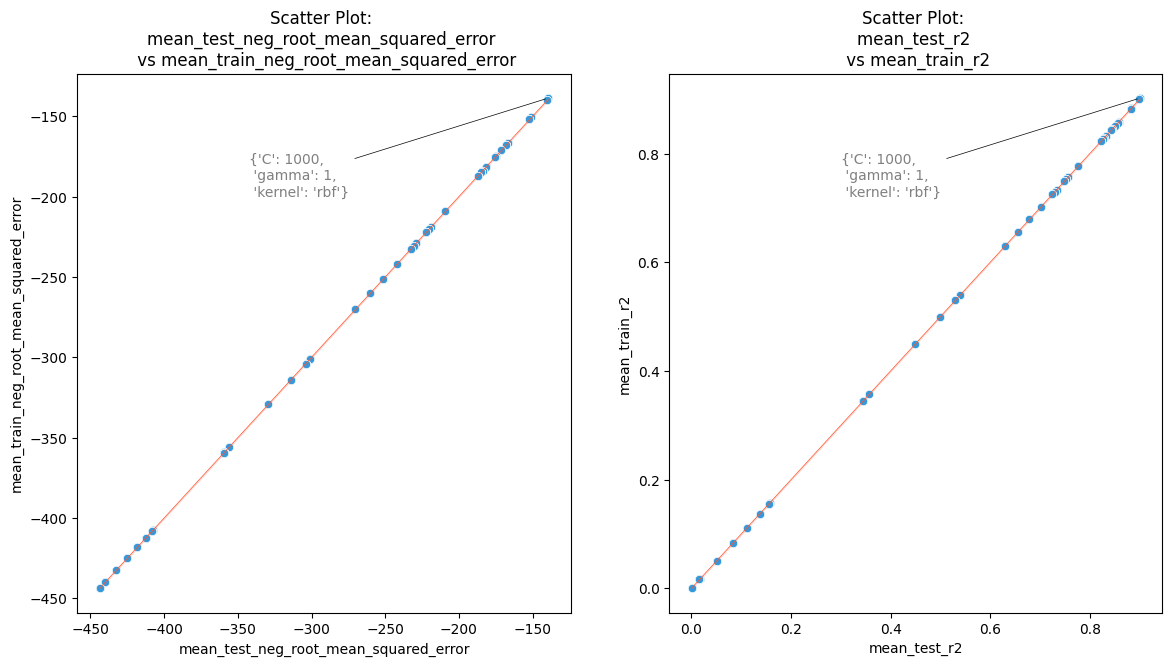

In [4]:
plot_values(df_svr,'svr')

# GBR

In [5]:
df_gbr = pd.read_excel("C:/Users/Daniel/OneDrive - Universidad de Antioquia/Analitica y Ciencia de Datos/1/Seminario/Monografia/grid search/grid_GBR_final_20231108.xlsx")

-43.00138872528724 -8.860010048985844
0.9905987386016936 0.9996004363280748


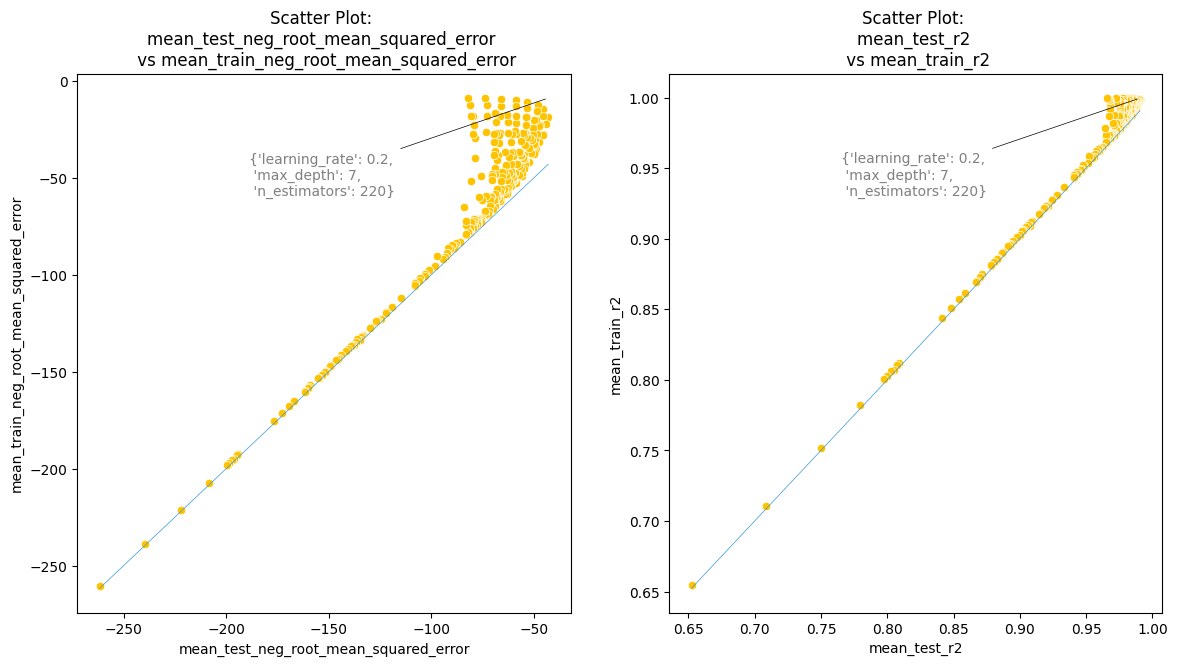

In [6]:
plot_values(df_gbr,'gbr')

# ABR

In [7]:
df_abr = pd.read_excel("C:/Users/Daniel/OneDrive - Universidad de Antioquia/Analitica y Ciencia de Datos/1/Seminario/Monografia/grid search/grid_ABR_final_20231108.xlsx")

-195.3844387910462 -194.900783025096
0.8060703072736233 0.807071008632616


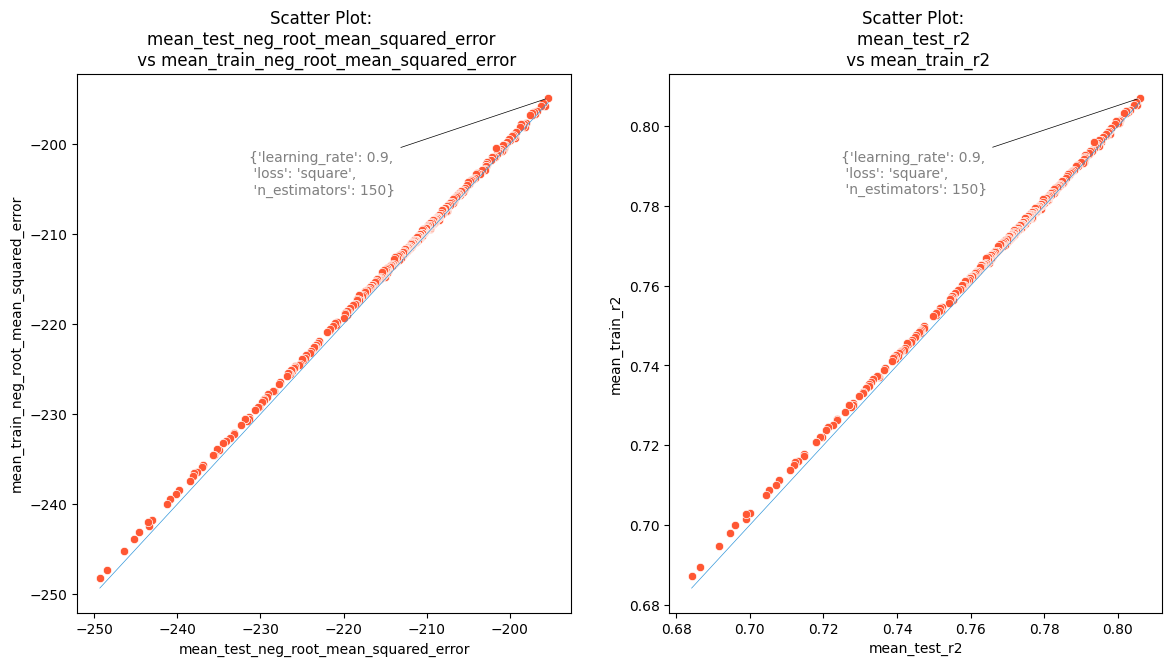

In [8]:
plot_values(df_abr,'abr')